# ANALISIS ESTADISTICO DE REDES SOCIALES
## TALLER 2 :  CONCEPTOS DE TEORIA DE GRAFOS, VISUALIZACION Y CARACTERIZACION

El siguiente documento tiene el fin la realización del segundo taller de ejercicios propuestos en la clase de Analisis Estadistico de Redes Sociales usando la libreria **Igraph**. El desarrollo a continuación

In [3]:
pip install plotnine

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     -------------------------------------- 60.4/60.4 kB 796.9 kB/s eta 0:00:00
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.3 MB 5.2 MB/s eta 0:00:01
   ----------------------------------- ---- 1.1/1.3 MB 12.1 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 10.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/114.4 kB ? eta -:--:--
   ---------------------------------------- 114.4/114.4 kB 6.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   - -------------------------------------- 1.5/46.2 MB 48.9 MB/s eta 0:00:01
   -- ------------------------------------- 3.2/46.2 MB 40.3 MB/s eta 0:00:02
   ---- -------------------------

In [4]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import igraph as ig
from plotnine import *
pd.options.display.float_format = '{:,.2f}'.format

### <font color='red'>PUNTO 1</font>

Reproducir los ejemplos 3.1, 3.2, 5.2, 5.3, 6.1 de https://rpubs.com/jstats1702/1126816 en Python usando igraph y/o NetworkX .

-  **<font color='blue'>EJEMPLO 3.1</font>**

In [5]:
g = ig.Graph([(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 5), (5, 6)])

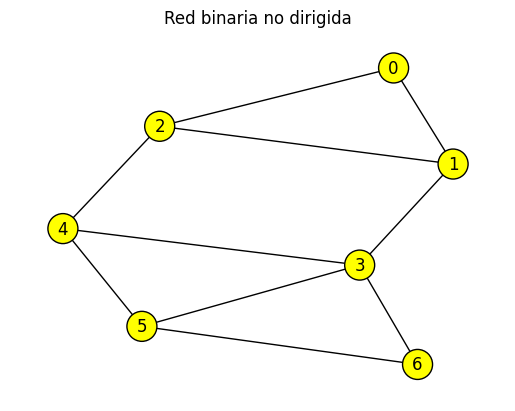

In [6]:
# Establecer la semilla
random.seed(123)

layout = g.layout("kamada_kawai") 
fig, ax = plt.subplots()

# Visualizar el grafo
ig.plot(g, target=ax, layout=layout, vertex_color="yellow", vertex_size=30, vertex_label_size=12, 
        vertex_label_dist = 0, edge_color="black", edge_width=1, vertex_label=g.vs.indices)
plt.title("Red binaria no dirigida")
plt.show()

In [7]:
# Obtener los vecinos del vértice 1
neighbors_of_0 = g.neighbors(0)

print("Vecinos del vértice 0:", neighbors_of_0)

Vecinos del vértice 0: [1, 2]


In [8]:
grados_de_g = g.degree()
print("Grados de los vertices de g: \n", grados_de_g)

Grados de los vertices de g: 
 [2, 3, 3, 4, 3, 3, 2]


-  **<font color='blue'>EJEMPLO 3.2</font>**

In [9]:
# Grafo dirigido
dg = ig.Graph([(0,1),(0,2),(1,2),(2,1)], directed=True)

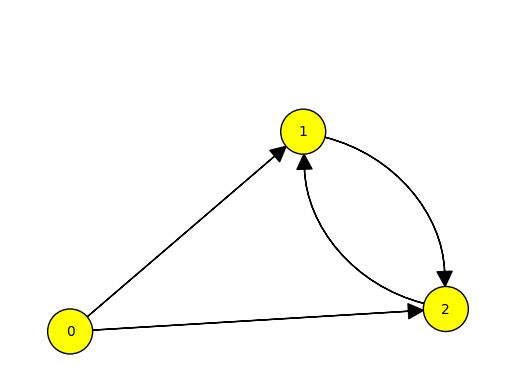

<Figure size 800x600 with 0 Axes>

In [10]:
# Graficar la red binaria dirigida
fig, ax = plt.subplots()
#layout = g.layout("kamada_kawai")

plt.figure(figsize=(8, 6))
ig.plot(dg, target=ax, vertex_color="yellow", edge_width = 1 , vertex_size=45, vertex_label_size=10, 
        vertex_label_dist = 0, edge_color="black", vertex_label=dg.vs.indices, main="Red ponderada no dirigida")


plt.show()

In [11]:
# Calcular el grado de entrada de los nodos en el grafo dirigido dg
degrees1 = dg.degree(mode = "in")

print("Grado de entrada de los nodos:", degrees1)

Grado de entrada de los nodos: [0, 2, 2]


In [12]:
degrees2 = dg.degree(mode = "out")

print("Grado de salida de los nodos:", degrees2)

Grado de salida de los nodos: [2, 1, 1]


-  **<font color='blue'>EJEMPLO 5.2</font>**

In [13]:
# Crear el grafo no dirigido g

g = ig.Graph([(0,6),(1,6),(1,3),(2,5),(3,6),(4,10),(5,11),(6,7),(6,8),(6,9)])

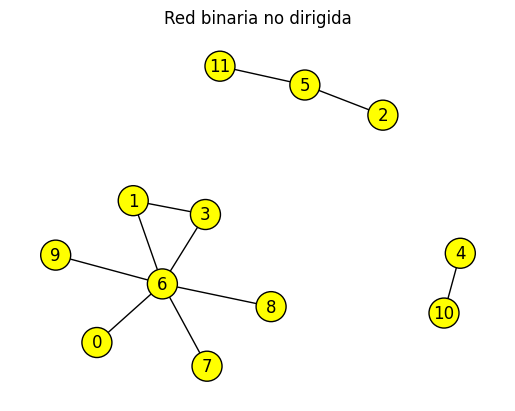

In [14]:
# Establecer la semilla
random.seed(123)

layout = g.layout("kamada_kawai") 
fig, ax = plt.subplots()

# Visualizar el grafo
ig.plot(g, target=ax, vertex_color="yellow", vertex_size=30, vertex_label_size=12, 
        vertex_label_dist = 0, edge_color="black", edge_width=1, vertex_label=g.vs.indices)
plt.title("Red binaria no dirigida")
plt.show()

In [15]:
print("La red esta conectada:", g.is_connected() )

La red esta conectada: False


In [16]:
# Obtener la información de los clusters
clusters = g.clusters()

def PC (clusters):
    pertenencia = {}
    for i, cluster in enumerate(clusters):
        for nodo in cluster:
            pertenencia[nodo] = i
    matriz_pertenencia = [[], []]
    for nodo, cluster_id in pertenencia.items():
        matriz_pertenencia[0].append(nodo)
        matriz_pertenencia[1].append(cluster_id)
    
    # Imprimir la matriz de pertenencia
    print(" ".join(map(str, matriz_pertenencia[0])))
    print(" ".join(map(str, matriz_pertenencia[1])))

# Imprimir la pertenencia a los clusters, los tamaños de los clusters y el número de clusters
print("Pertenencia a los clusters:")
PC(clusters)
print("Tamaños de los clusters:", len(clusters[0]),len(clusters[1]),len(clusters[2]))
print("Número de clusters:", len(clusters))

Pertenencia a los clusters:
0 1 3 6 7 8 9 2 5 11 4 10
0 0 0 0 0 0 0 1 1 1 2 2
Tamaños de los clusters: 7 3 2
Número de clusters: 3


C:\Users\HP\AppData\Local\Temp\ipykernel_16908\2542600051.py:2: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead


-  **<font color='blue'>EJEMPLO 5.3</font>**

In [17]:
# Grafo dirigido
dg = ig.Graph([(0,1),(0,2),(1,2),(2,1)], directed=True)

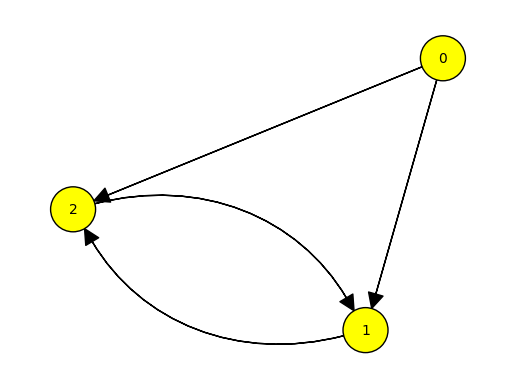

<Figure size 800x600 with 0 Axes>

In [18]:
# Graficar la red binaria dirigida
fig, ax = plt.subplots()
#layout = g.layout("kamada_kawai")

plt.figure(figsize=(8, 6))
ig.plot(dg, target=ax, vertex_color="yellow", edge_width = 1 , vertex_size=45, vertex_label_size=10, 
        vertex_label_dist = 0, edge_color="black", vertex_label=dg.vs.indices, main="Red ponderada no dirigida")


plt.show()

In [19]:
Connected1 = dg.is_connected(mode = "weak")
print("El grafo es conectado de forma debil: ", Connected1)

Connected2 = dg.is_connected(mode = "strong")
print("El grafo es conectado de forma fuerte: ", Connected2)

El grafo es conectado de forma debil:  True
El grafo es conectado de forma fuerte:  False


-  **<font color='blue'>EJEMPLO 6.1</font>**

In [20]:
g = ig.Graph([(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 5), (5, 6)])

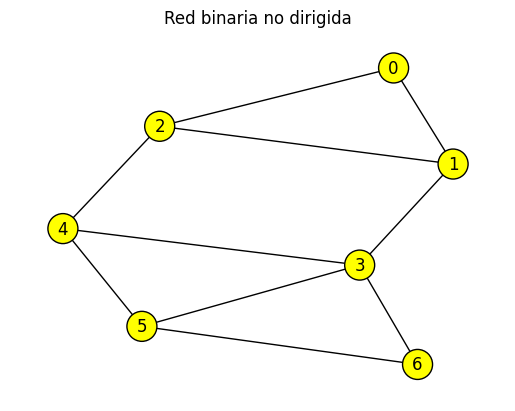

In [21]:
# Establecer la semilla
random.seed(123)

layout = g.layout("kamada_kawai") 
fig, ax = plt.subplots()

# Visualizar el grafo
ig.plot(g, target=ax, layout=layout, vertex_color="yellow", vertex_size=30, vertex_label_size=12, 
        vertex_label_dist = 0, edge_color="black", edge_width=1, vertex_label=g.vs.indices)
plt.title("Red binaria no dirigida")
plt.show()

In [22]:
print("Distancias de 0 a 6:", g.shortest_paths(0, 6)[0][0])

Distancias de 0 a 6: 3


C:\Users\HP\AppData\Local\Temp\ipykernel_16908\3486963832.py:1: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead


In [23]:
print("Caminos más cortos de 0 a 6:", g.get_shortest_paths(0, to=6)[0])

Caminos más cortos de 0 a 6: [0, 1, 3, 6]


In [24]:
D = g.shortest_paths()
print("Matriz de distancias:")
for row in D:
    print(row)

Matriz de distancias:
[0, 1, 1, 2, 2, 3, 3]
[1, 0, 1, 1, 2, 2, 2]
[1, 1, 0, 2, 1, 2, 3]
[2, 1, 2, 0, 1, 1, 1]
[2, 2, 1, 1, 0, 1, 2]
[3, 2, 2, 1, 1, 0, 1]
[3, 2, 3, 1, 2, 1, 0]


C:\Users\HP\AppData\Local\Temp\ipykernel_16908\482109952.py:1: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead


In [25]:
# Calcular el diámetro del grafo
diameter = g.diameter()
print("Diámetro del grafo:", g.diameter())

Diámetro del grafo: 3


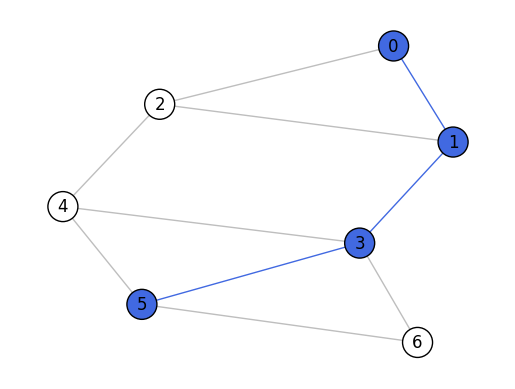

In [26]:
# Calcular el diámetro del grafo
diameter_nodes = g.get_diameter()
diameter_edges = [(diameter_nodes[i], diameter_nodes[i+1]) for i in range(len(diameter_nodes)-1)]

# Configurar los colores y anchos de las aristas y nodos
g.vs["color"] = "white"  # Establecer el color de los nodos a blanco
g.es["color"] = "grey"    # Establecer el color de las aristas a gris
g.es["width"] = 1         # Establecer el ancho de las aristas a 1

# Colorear nodos y aristas en el camino del diámetro
for node in diameter_nodes:
    g.vs[node]["color"] = "royalblue"
for edge in diameter_edges:
    g.es.select(_within=edge)["color"] = "royalblue"

fig, ax = plt.subplots()

# Visualizar el grafo
ig.plot(g,target= ax, bbox=(300, 300), vertex_label=g.vs.indices)  # bbox define el tamaño de la figura

In [27]:
# Calcular la distancia geodésica promedio
mean_distance = g.average_path_length()

print("Distancia geodésica promedio:", mean_distance)

Distancia geodésica promedio: 1.6666666666666667


In [28]:
# Obtener las distancias entre todos los pares de nodos
distances = g.shortest_paths()

# Contar las ocurrencias de cada distancia
distance_distribution = [dist for sublist in distances for dist in sublist if dist < float('inf')]

# Imprimir la distribución de las distancias
print("Distribución de las distancias:")
for i in range(max(distance_distribution) + 1):
    count = distance_distribution.count(i)
    print(f"Distancia: {i}, Count: {count}")

Distribución de las distancias:
Distancia: 0, Count: 7
Distancia: 1, Count: 20
Distancia: 2, Count: 16
Distancia: 3, Count: 6


C:\Users\HP\AppData\Local\Temp\ipykernel_16908\4239942166.py:2: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead


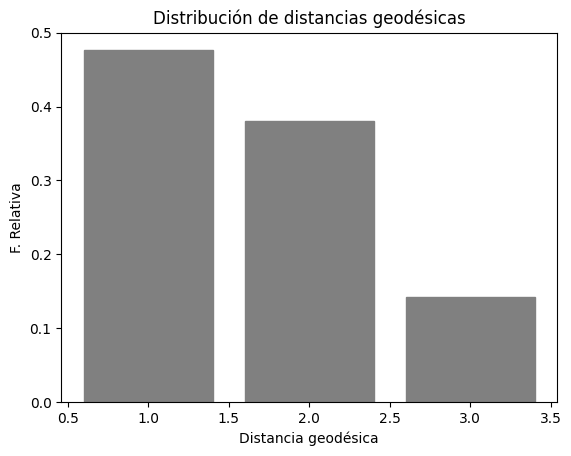

In [29]:
# Calcular la frecuencia relativa de cada distancia, excluyendo la distancia 0
dist_count = {}
for dist in distance_distribution:
    if dist != 0:
        dist_count[dist] = dist_count.get(dist, 0) + 1

total_paths = len(distance_distribution) - distance_distribution.count(0)
rel_freq = {key: val / total_paths for key, val in dist_count.items()}

# Graficar la distribución de distancias
plt.bar(rel_freq.keys(), rel_freq.values(), color='grey', edgecolor='grey')
plt.xlabel('Distancia geodésica')
plt.ylabel('F. Relativa')
plt.title('Distribución de distancias geodésicas')
plt.show()

###  <font color='red'>PUNTO 2</font>

El grado de un nodo en una red tanto dirigida como no dirigida se puede calcular fácilmente a partir de la matriz de adyacencia $\mathbf{Y}=\left[y_{i, j}\right]$. El out-degree $d_i^{\text {out }}$ y el in-degree $d_i^{\text {in }}$ del nodo $i$ se pueden calcular respectivamente como:

$$
d_i^{\text {out }}=\sum_{j: j \neq i} y_{i, j} \quad \text { y } \quad d_i^{\text {in }}=\sum_{j: j \neq i} y_{j, i} .
$$

**Muestre que si la red es no dirigida entonces $d_i^{\text {out }}=d_i^{\text {in }}$.**

#### **<font color='blue'>SOLUCION</font>**

Para demostrar que si la red es no dirigida, entonces el grado de salida de un nodo es igual al grado de entrada del mismo nodo, podemos utilizar la definición de la matriz de adyacencia para una red no dirigida.

En una red no dirigida, la matriz de adyacencia $\mathbf{Y}$ es simétrica, lo que significa que $y_{i,j} = y_{j,i}$ para todos los nodos $i$ y $j$. Esto se debe a que si hay una conexión entre el nodo $i$ y el nodo $j$, entonces también habrá una conexión entre el nodo $j$ y el nodo $i$ en una red no dirigida.

Dado esto, podemos reescribir las fórmulas para el grado de salida $d_i^{\text{out}}$ y el grado de entrada $d_i^{\text{in}}$ como:

$$
d_i^{\text{out}} = \sum_{j: j \neq i} y_{i,j} = \sum_{j: j \neq i} y_{j,i} = d_i^{\text{in}}
$$

En la segunda igualdad, intercambiamos los índices $i$ y $j$ debido a la simetría de la matriz de adyacencia en una red no dirigida. Por lo tanto, hemos demostrado que en una red no dirigida, el grado de salida de un n


In [ ]:
## EJEMPLO EN PYTHON DE LO ANTERIOR 

In [30]:
import igraph as ig

# Crear un grafo no dirigido
g_undirected = ig.Graph([(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 5), (5, 6)])

# Crear un grafo dirigido
g_directed = ig.Graph([(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 5), (5, 6)], directed=True)

# Obtener la matriz de adyacencia para ambos grafos
adjacency_matrix_undirected = g_undirected.get_adjacency()
adjacency_matrix_directed = g_directed.get_adjacency()

# Calcular el grado de salida e grado de entrada para un nodo específico (por ejemplo, nodo 0) en el grafo no dirigido
node_id = 0
out_degree_undirected = sum(adjacency_matrix_undirected[node_id])
in_degree_undirected = sum(row[node_id] for row in adjacency_matrix_undirected)

# Calcular el grado de salida e grado de entrada para un nodo específico (por ejemplo, nodo 0) en el grafo dirigido
out_degree_directed = sum(adjacency_matrix_directed[node_id])
in_degree_directed = sum(row[node_id] for row in adjacency_matrix_directed)

# Imprimir los resultados
print("Grafo no dirigido:")
print(f"Grado de salida del nodo {node_id}: {out_degree_undirected}")
print(f"Grado de entrada del nodo {node_id}: {in_degree_undirected}")

print("\nGrafo dirigido:")
print(f"Grado de salida del nodo {node_id}: {out_degree_directed}")
print(f"Grado de entrada del nodo {node_id}: {in_degree_directed}")

Grafo no dirigido:
Grado de salida del nodo 0: 2
Grado de entrada del nodo 0: 2

Grafo dirigido:
Grado de salida del nodo 0: 2
Grado de entrada del nodo 0: 0


###  <font color='red'>PUNTO 3</font>

Tanto para redes dirigidas como no dirigidas, se define la media global de las interacciones como:

$$\bar{y}=\frac{1}{n(n-1)} \sum_{i, j: i \neq j} y_{i, j}.$$

donde $\mathbf{Y}=\left[y_{i, j}\right]$ es la matriz de adyacencia de la red correspondiente. Tal estadístico describe de manera rudimentaria la posibilidad de observar una relación entre dos nodos cualesquiera, dado que no tiene en cuenta la heterogeneidad nodal (algunos nodos son más propensos a enviar/recibir más relacines).
{Y}$.

-  **Muestre que para relaciones no dirigidas la media global $\bar{y}$ es igual a la media tanto de la parte triangular superior de $\mathbf{Y}$ como de la parte triangular inferior de $\mathbf{Y}$.**

#### **<font color='blue'>SOLUCION</font>**

Para mostrar que para relaciones no dirigidas la media global $\bar{y}$ es igual a la media tanto de la parte triangular superior de $\mathbf{Y}$ como de la parte triangular inferior de $\mathbf{Y}$, podemos utilizar la simetría de la matriz de adyacencia en redes no dirigidas.

En una red no dirigida, la matriz de adyacencia $\mathbf{Y}$ es simétrica, lo que significa que $y_{i,j} = y_{j,i}$ para todos los nodos $i$ y $j$. Por lo tanto, la parte triangular superior de $\mathbf{Y}$ y la parte triangular inferior de $\mathbf{Y}$ son iguales.

Dado esto, podemos reescribir la fórmula para la media global $\bar{y}$ utilizando solo la parte triangular superior (o inferior) de $\mathbf{Y}$:

$$
\bar{y} = \frac{1}{n(n-1)} \sum_{i, j: i \neq j} y_{i, j} = \frac{1}{n(n-1)} \sum_{i=1}^{n} \sum_{j=i+1}^{n} y_{i, j}
$$

Donde hemos utilizado el hecho de que $y_{i,j} = y_{j,i}$ para $i \neq j$.

Así, hemos demostrado que para relaciones no dirigidas, la media global $\bar{y}$ es igual a la media tanto de la parte triangular superior como de la parte triangular inferior de la matriz de adyacencia $\mathbf{Y}$.


- **Muestre que tanto para relaciones dirigidas como no dirigidas la media global corresponde a la densidad de la red.**

#### **<font color='blue'>SOLUCION</font>**

Para demostrar que tanto para relaciones dirigidas como no dirigidas la media global corresponde a la densidad de la red, primero definimos la densidad de la red.

La densidad de una red se define como la fracción de los posibles enlaces que están realmente presentes en la red. Para una red no dirigida, esto es el número de enlaces presentes dividido por el número total de posibles enlaces. Para una red dirigida, es el número de arcos presentes dividido por el número total de posibles arcos.

Para una red no dirigida con $n$ nodos, hay $\frac{n(n-1)}{2}$ posibles enlaces, mientras que para una red dirigida hay $n(n-1)$ posibles arcos.

La media global de las interacciones, $\bar{y}$, se calcula como:

$$
\bar{y} = \frac{1}{n(n-1)} \sum_{i, j: i \neq j} y_{i, j}
$$

donde $y_{i, j}$ es el elemento $i, j$ de la matriz de adyacencia $\mathbf{Y}$.

Para una red no dirigida, el valor promedio $\bar{y}$ será igual al número total de enlaces presentes dividido por el número total de posibles enlaces, que es exactamente la definición de densidad.

Para una red dirigida, el valor promedio $\bar{y}$ será igual al número total de arcos presentes dividido por el número total de posibles arcos, que también es la definición de densidad.

Por lo tanto, hemos demostrado que tanto para relaciones dirigidas como no dirigidas, la media global corresponde a la densidad de la red. red.
"""


- **Muestre que tanto para relaciones dirigidas como no dirigidas se tiene que $\bar{d}^{\text {out }}=\bar{d}^{\mathrm{n}}=(n-1) \bar{y}$. Es decir, el grado promedio tanto de entrada como de salida son iguales, y además, equivalentes a la densidad.**

#### **<font color='blue'>SOLUCION</font>**

Para mostrar que tanto para relaciones dirigidas como no dirigidas se tiene que $ \bar{d}^{\text {out }} = \bar{d}^{\mathrm{n}} = (n-1) \bar{y} $, donde $ \bar{d}^{\text{out}} $ es el grado promedio de salida, $ \bar{d}^{\text{n}} $ es el grado promedio en una red no dirigida y $ \bar{y} $ es la densidad de la red, podemos utilizar la relación entre el grado promedio y la densidad de la red.

Para una red no dirigida con $ n $ nodos, el grado promedio $ \bar{d}^{\text{n}} $ es igual al doble de la densidad de la red, ya que cada enlace contribuye con dos grados (uno para cada nodo conectado). Por lo tanto:

$$ \bar{d}^{\text{n}} = 2 \times \bar{y} $$

Para una red dirigida con $ n $ nodos, el grado promedio $ \bar{d}^{\text{out}} $ es igual al número promedio de arcos salientes de un nodo, que es igual a la densidad de la red multiplicada por $ n-1 $, ya que cada nodo tiene $ n-1 $ posibles destinos para sus arcos salientes:

$$ \bar{d}^{\text{out}} = (n-1) \times \bar{y} $$

Dado que tanto para relaciones dirigidas como no dirigidas la densidad de la red $ \bar{y} $ es la misma, podemos concluir que $ \bar{d}^{\text {out }} = \bar{d}^{\mathrm{n}} = (n-1) \bar{y} $, lo que significa que el grado promedio tanto de salida como de entrada son iguales y equivalentes a la densidad de la red.

Este resultado es importante porque muestra que el grado promedio de los nodos en una red está directamente relacionado con la densidad de la red, independientemente de si la red es dirigida o no dirigida.



### <font color='red'>PUNTO 4</font>

Considere un grafo estrella de orden $n$ y un grafo círculo de orden $n$. A continuación se representan ambos grafos para $n=9$. Estos grafos tienen aproximadamente la misma densidad, pero su estructura es muy diferente. Recuerde que la densidad de un grafo se puede calcular como el grado promedio dividido por $n-1$.

**Para la solucion**

Para demostrar que para el grafo círculo de orden $ n $ el grado promedio es $ \bar{d} = 2 $, y para el grafo estrella de orden $ n $ el grado promedio tiende a $ 2 $ cuando $ n $ tiende a infinito, primero necesitamos entender la estructura de estos grafos.

Un grafo círculo de orden $ n $ consiste en $ n $ nodos dispuestos en un círculo, donde cada nodo está conectado a sus dos nodos vecinos más cercanos. Por lo tanto, cada nodo tiene grado $ 2 $, ya que está conectado a sus dos vecinos.

Un grafo estrella de orden $ n $ tiene un nodo central conectado a todos los otros $ n-1 $ nodos, pero estos nodos no están conectados entre sí. Por lo tanto, el nodo central tiene grado $ n-1 $, mientras que los nodos periféricos tienen grado $ 1 $.

Ahora, calculemos el grado promedio para cada uno de estos grafos:

- **Muestre que para el grafo círculo de orden $n$ el grado promedio es $\bar{d}=2$.**

#### **<font color='blue'>SOLUCION</font>**

 Para el grafo círculo de orden $ n $, cada nodo tiene grado $ 2 $ ya que está conectado a sus dos vecinos más cercanos. Por lo tanto, el grado promedio $ \bar{d} $ es simplemente $ 2 $.

- **Muestre que para el grafo estrella de orden $n$ el grado promedio es $\bar{d}=2 \frac{n-1}{n} \rightarrow 2$ cuando $n \rightarrow \infty$.**

#### **<font color='blue'>SOLUCION</font>**


El nodo central tiene grado $n-1$ y hay $n-1$ nodos periféricos, cada uno con grado $1$. Entonces, la suma de los grados de todos los nodos es $(n-1) + (n-1) \cdot 1$. 

Por lo tanto, el grado promedio $\bar{d}$ se calcula como:

$$
\bar{d} = \frac{(n-1) + (n-1) \cdot 1}{n}
$$

$$
\bar{d} = \frac{n - 1 + n - 1}{n}
$$

$$
\bar{d} = \frac{2n - 2}{n}
$$

$$
\bar{d} = 2 - \frac{2}{n}
$$

Cuando $n$ tiende a infinito, $\frac{2}{n}$ tiende a $0$, por lo que $\bar{d}$ tiende a $2$.

Entonces, hemos verificado que para el grafo estrella de orden $n$, el grado promedio tiende a $2$ cuand $n$ tiende a infinito.


### <font color='red'>PUNTO 5</font>

**¿Cuáles de las siguientes secuencias son caminatas en el grafo que se presenta a continuación? ¿Cuáles senderos? ¿Cuáles circuitos? ¿Cuáles ciclos?**

#### **<font color='blue'>SOLUCION</font>**

Se creo una rutina en Python que identifica segun la secuencia entre sendero, circuitos y ciclos.

In [31]:
import igraph as ig

def determinar_tipo_secuencia(grafo, secuencia):
    """
    Determina si una secuencia es una caminata, un sendero, un circuito o un ciclo en el grafo dado.

    Parámetros:
        grafo (igraph.Graph): El grafo.
        secuencia (list): La secuencia de vértices.

    Devuelve:
        str: El tipo de secuencia ("Caminata", "Sendero", "Circuito", "Ciclo").
    """
    tipo = "Caminata"
    
    # Verificar si es un sendero
    if len(set(secuencia)) == len(secuencia):
        tipo = "Sendero"
        # Verificar si es un circuito
        if len(secuencia) > 1 and secuencia[0] == secuencia[-1]:
            tipo = "Circuito"
            # Verificar si es un ciclo
            if len(set(secuencia[:-1])) == len(secuencia[:-1]):
                tipo = "Ciclo"
    return tipo

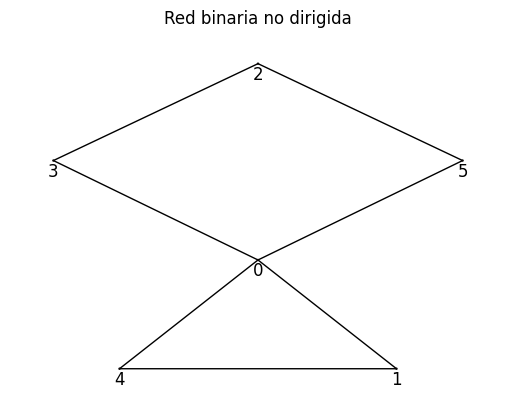

In [32]:
# Definir el grafo
g = ig.Graph([(0, 1), (1, 4), (4, 0), (0, 3), (3, 2), (2, 5), (5, 0)])

# Establecer la semilla
random.seed(123)

layout = g.layout("kamada_kawai") 
fig, ax = plt.subplots()

# Visualizar el grafo
ig.plot(g, target=ax, layout=layout, vertex_size= 1, vertex_label_size=12, 
        vertex_label_dist = 15, edge_color="black", edge_width=1, vertex_label=g.vs.indices)
plt.title("Red binaria no dirigida")
plt.show()

In [34]:
# Secuencias de prueba
secuencias = [
    [1, 0, 5, 2, 3],
    [1, 0, 5, 2, 3, 0, 4],
    [1, 0, 1, 4, 0, 3],
    [1, 0, 5, 2, 3]
]

# Determinar el tipo de secuencia para cada secuencia
for i, secuencia in enumerate(secuencias):
    print("Tipo de secuencia para secuencia_{}: {}".format(i+1, determinar_tipo_secuencia(g, secuencia)))

Tipo de secuencia para secuencia_1: Sendero
Tipo de secuencia para secuencia_2: Caminata
Tipo de secuencia para secuencia_3: Caminata
Tipo de secuencia para secuencia_4: Sendero


### <font color='red'>PUNTO 6</font>

El conjunto de datos `comtrade.RData` contiene un arreglo de cuatro dimensiones denominado `comtrade`. Los nombres de las dimensiones son: países, años (1996-2005) y clases de productos diferentes. Puedes cargar los datos con el siguiente código en R:

```R
datos <- load("comtrade.RData")
dimnames(comtrade)[c(1, 3, 4)]


- **Calcule el aumento medio global $\bar{Y}$ a lo largo de los 10 años en bienes manufacturados. Para ello considere la matriz de adyacencia $Y$ dada por:**

```R
Y <- apply(X = comtrade[, , c(5, 6)], MARGIN = c(1, 2), FUN = mean)


_Se ejecutaron ambos comandos en `R` y se exporto la matriz Y como archivo csv con la libreria `pandas`._